# Capstone Project

In this project i will try to create model which will predict popularitty of news article prior to publication.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

data = pd.read_csv("OnlineNewsPopularity.csv")

data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
popularity_raw = data[data.keys()[-1]]
popularity_raw.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

We see median is 1400 so if we keep threshold to separate popular and non popular article 1400 we will get perfectly balanced sets.

In [3]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
popular_label = pd.Series(label_encoder.fit_transform(popularity_raw>=1400))

In [4]:
# Now get the features from dataset

features_raw = data.drop(['url',data.keys()[1],data.keys()[-1]], axis=1)
display(features_raw.head())

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']


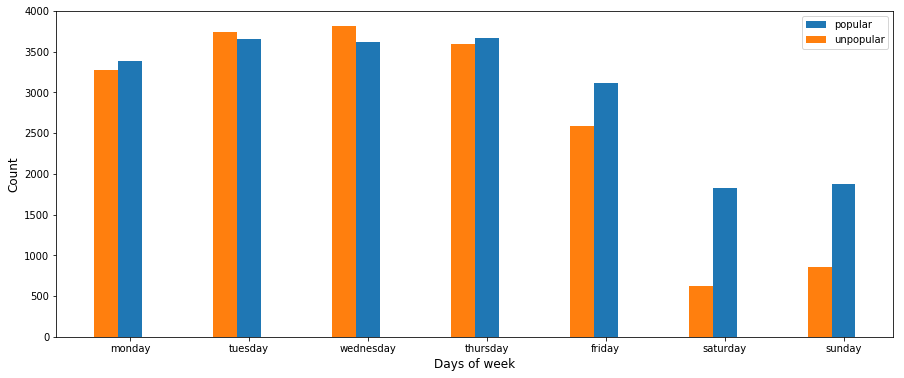

In [73]:
# Visualize the popular and unpopular articles for each day of week
columns_day = features_raw.columns.values[29:36]
unpopnews=data[data[' shares']<1400]
popnews=data[data[' shares']>=1400]
unpop_day = unpopnews[columns_day].sum().values
pop_day = popnews[columns_day].sum().values

day = []
for i in range(7):
    d = columns_day[i].split("_")[2]
    day.append(d)

import matplotlib.pyplot as pl
fig = pl.figure(figsize = (15,6))

pl.bar(np.arange(len(columns_day)), pop_day,width = 0.2 ,align="center",label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.2, unpop_day, width = 0.2 ,align="center",label = "unpopular")
pl.xticks(np.arange(len(columns_day)), day)
pl.ylabel("Count", fontsize = 12)
pl.xlabel("Days of week", fontsize = 12)
pl.legend(loc = 'upper right')
pl.show()

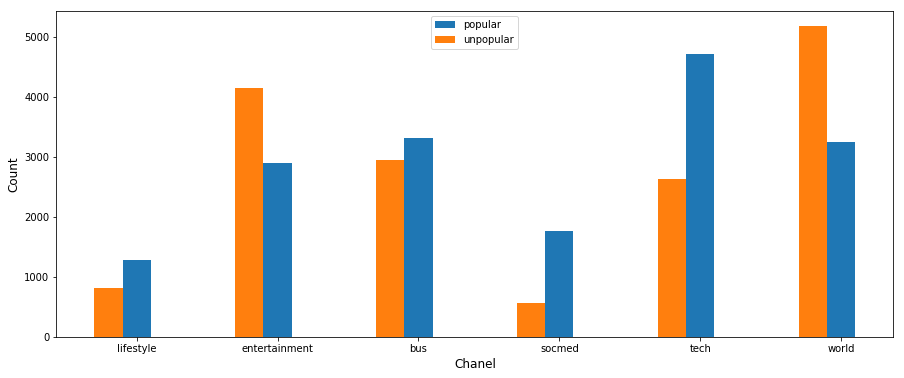

In [86]:
channel_type = features_raw.columns.values[11:17]
unpopnews=data[data[' shares']<1400]
popnews=data[data[' shares']>=1400]
unpop_chan = unpopnews[channel_type].sum().values
pop_chan = popnews[channel_type].sum().values

channel = []
for i in range(6):
    d = channel_type[i].split("_")[3]
    channel.append(d)

import matplotlib.pyplot as pl
fig = pl.figure(figsize = (15,6))

pl.bar(np.arange(len(channel_type)), pop_chan,width = 0.2 ,align="center",label = "popular")
pl.bar(np.arange(len(channel_type)) - 0.2, unpop_chan, width = 0.2 ,align="center",label = "unpopular")
pl.xticks(np.arange(len(channel_type)), channel)
pl.ylabel("Count", fontsize = 12)
pl.xlabel("Chanel", fontsize = 12)
pl.legend(loc = 'upper center')
pl.show()

In [101]:
def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate([' n_tokens_content',' global_sentiment_polarity']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 2000))
        ax.set_yticks([0, 500, 1000, 1500, 2000])
        ax.set_yticklabels([0, 500, 1000, 1500, ">5000"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



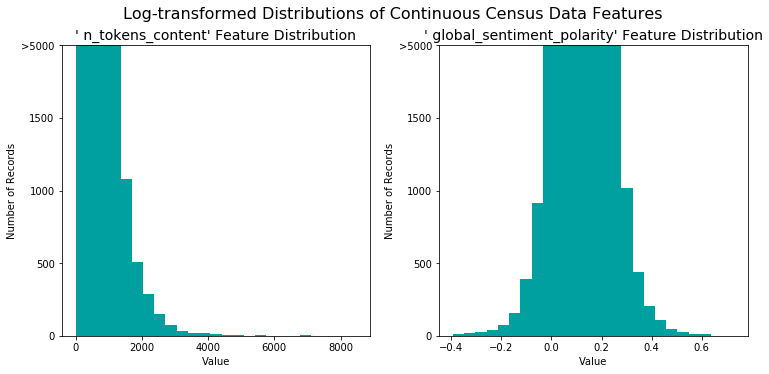

In [158]:
distribution(data, transformed = True)

In [104]:
data_new = data

data_new['popularity'] = data[' shares'].apply(lambda x: 'popular' if x >= 1400  else 'unpopular')


<BarContainer object of 39644 artists>

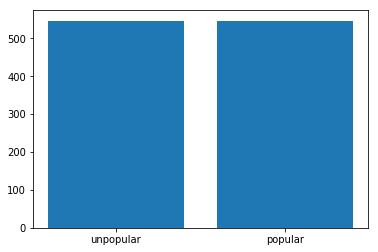

In [156]:
pl.bar(data_new['popularity'],data_new[' n_tokens_content'].mean() )

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = [' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_self_hrefs', ' num_imgs',' num_videos',\
            ' average_token_length',' num_keywords',' self_reference_min_shares',' self_reference_max_shares',\
             ' self_reference_avg_sharess']
features_raw[numerical] = scaler.fit_transform(data[numerical])
display(features_raw.head(n = 1))

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.47619,0.025844,0.663594,1.0,0.815385,0.013158,0.017241,0.007812,0.0,0.582024,...,0.378636,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0.0,0.1875


In [108]:
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    popular_label, 
                                                    test_size = 0.2, 
                                                    random_state = 0)


print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 31715 samples.
Testing set has 7929 samples.


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [111]:


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time

    results['train_time'] = end-start
        
    # Get predictions on the first 4000 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:4000])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 4000 training samples
    results['acc_train'] = accuracy_score(y_train[:4000],predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 4000 training samples
    results['f_train'] = fbeta_score(y_train[:4000],predictions_train,beta=1)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
    
    # Compute AUC on the the first 4000 training samples
    results['auc_train'] = roc_auc_score(y_train[:4000],predictions_train)
        
    # Compute AUC on the test set
    results['auc_test'] = roc_auc_score(y_test,predictions_test)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print ("{} with accuracy {}, F1 {} and AUC {}.".format(learner.__class__.__name__,\
          results['acc_test'],results['f_test'], results['auc_test']))   
    # Return the results
    return results

In [123]:
import matplotlib.patches as mpatches
def evaluate(results,name):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 4, figsize = (20,12))

    # Constants
    bar_width = 0.2
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'auc_train','pred_time', 'acc_test',\
                                    'f_test', 'auc_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//4, j%4].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//4, j%4].set_xticks([0.45, 1.45, 2.45])
                ax[j//4, j%4].set_xticklabels(["1%", "10%", "100%"])
                ax[j//4, j%4].set_xlim((-0.1, 3.0))
    
    # Add labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[0, 3].set_ylabel("AUC")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    ax[1, 3].set_ylabel("AUC")
    ax[1, 0].set_xlabel("Training Set Size")
    ax[1, 1].set_xlabel("Training Set Size")
    ax[1, 2].set_xlabel("Training Set Size")
    ax[1, 3].set_xlabel("Training Set Size")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[0, 3].set_title("AUC on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    ax[1, 3].set_title("AUC on Training Subset")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[0, 3].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    ax[1, 3].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches,  bbox_to_anchor = (-1.4, 2.54),\
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.savefig(name)
    pl.tight_layout()
    pl.show()

GradientBoostingClassifier trained on 317 samples.
GradientBoostingClassifier with accuracy 0.5981838819523269, F1 0.6514223194748359 and AUC 0.5914099975680452.
GradientBoostingClassifier trained on 3171 samples.
GradientBoostingClassifier with accuracy 0.6463614579392105, F1 0.680637813211845 and AUC 0.6423348425069942.
GradientBoostingClassifier trained on 31715 samples.
GradientBoostingClassifier with accuracy 0.6690629335351242, F1 0.6974169741697416 and AUC 0.6658872709191194.
RandomForestClassifier trained on 317 samples.
RandomForestClassifier with accuracy 0.5602219699836045, F1 0.575945518667153 and AUC 0.5599244498260929.
RandomForestClassifier trained on 3171 samples.
RandomForestClassifier with accuracy 0.5932652289065455, F1 0.5907879710696613 and AUC 0.5955363098501826.
RandomForestClassifier trained on 31715 samples.
RandomForestClassifier with accuracy 0.6258040105940219, F1 0.6260869565217391 and AUC 0.6277920723382064.
LogisticRegression trained on 317 samples.
Logis

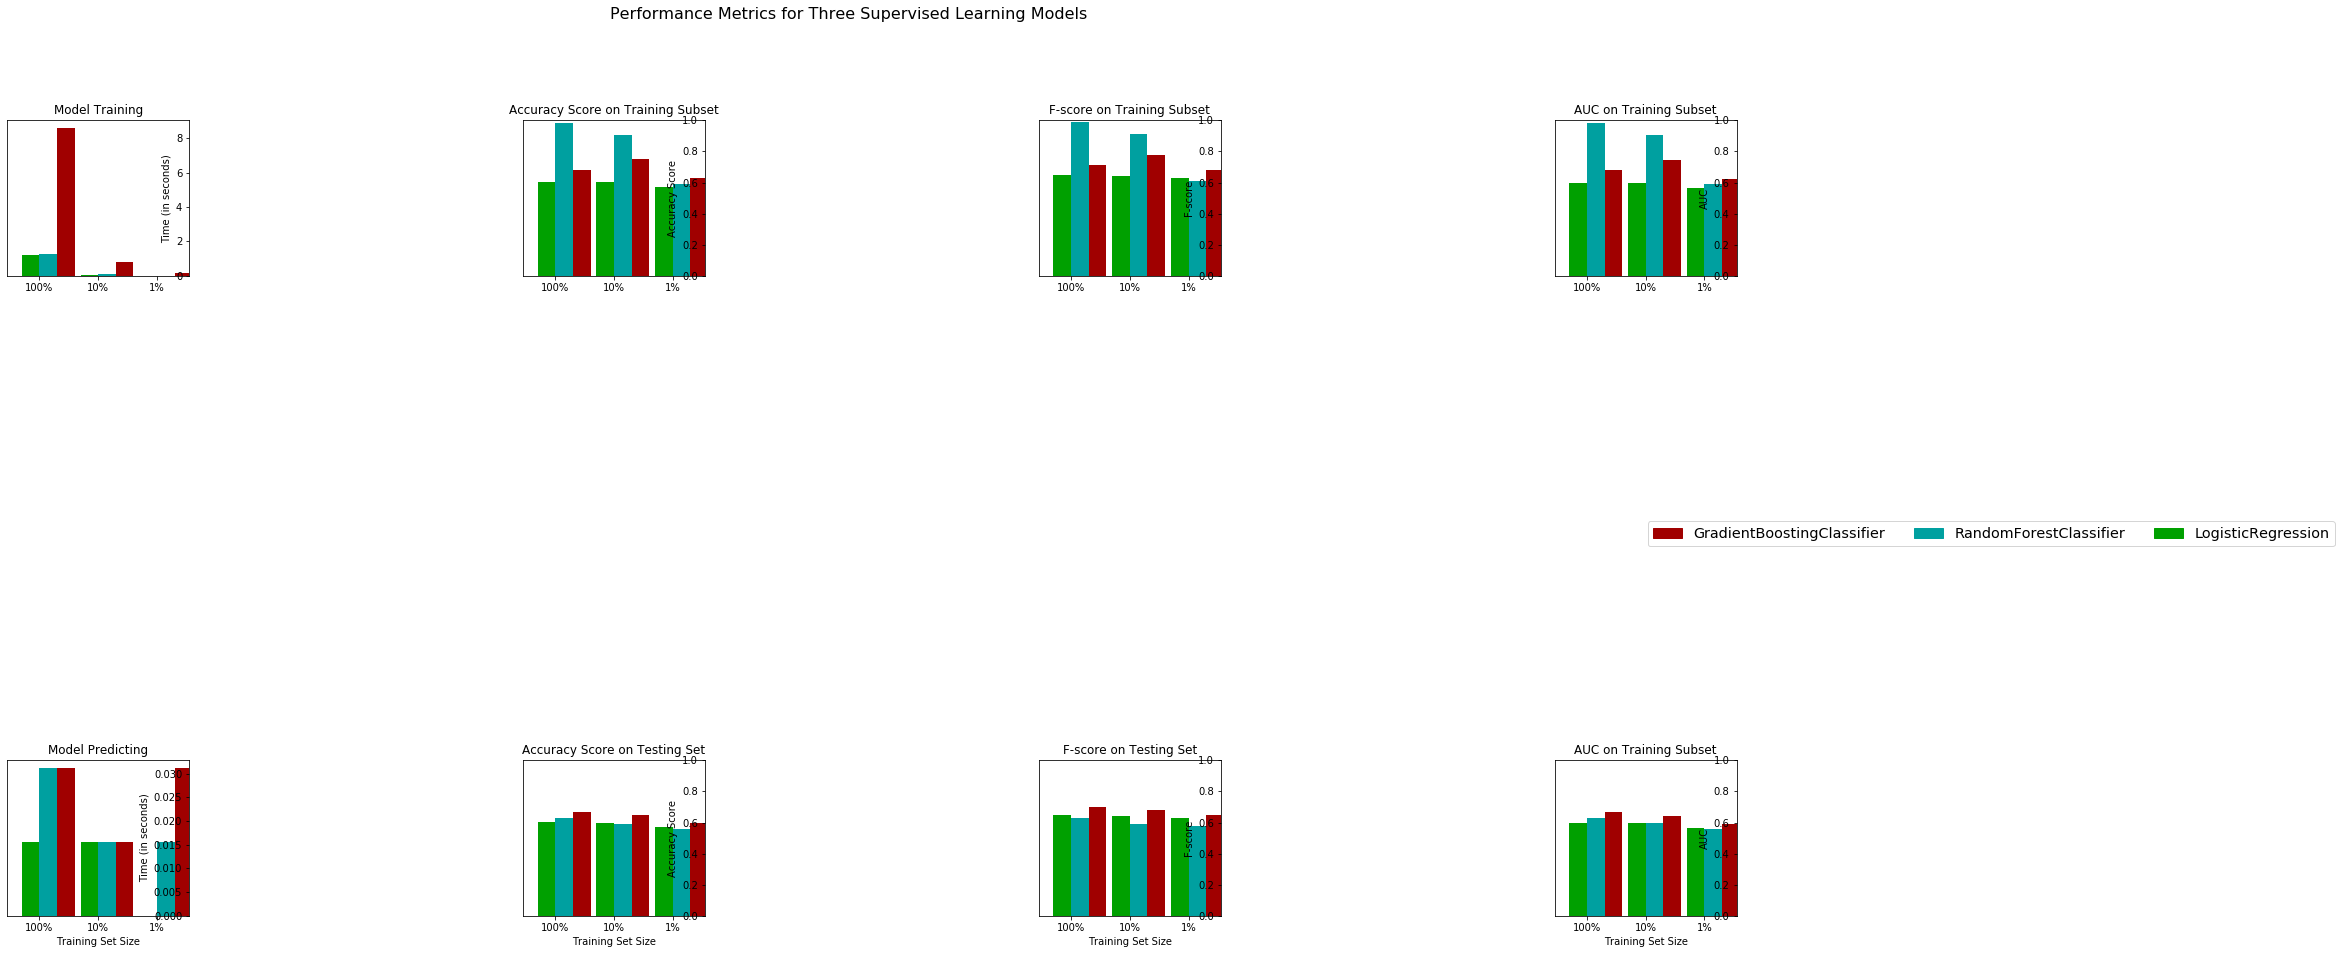

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from time import time

# TODO: Initialize the three models
clf_A = GradientBoostingClassifier(random_state = 50)
clf_B = RandomForestClassifier(random_state= 50)
clf_C = LogisticRegression(random_state= 50)

# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = int(len(y_train))
samples_10 = int(len(y_train) * 0.1)
samples_1 = int(len(y_train)* 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results, 'perf.jpg')

In [126]:
from sklearn.metrics import make_scorer 
from sklearn.grid_search import GridSearchCV

def gridsearch(clf,parameters,X_train, y_train, X_test, y_test):
    scorer = make_scorer(roc_auc_score)
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
    grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
    best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
    print (clf.__class__.__name__)
    print ("Unoptimized model\n------")
    print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions,beta=1)))
    print ("AUC on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
    print ("\nOptimized Model\n------")
    print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=1)))
    print ("Final AUC on the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))

    print (best_clf)

C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [128]:
# Grid search for gradient boosting

parameters = {"n_estimators": [100,300,500,700],
              "learning_rate": [0.1,0.5,1]}

gridsearch(clf_A,parameters,X_train, y_train, X_test, y_test)


GradientBoostingClassifier
Unoptimized model
------
Accuracy score on testing data: 0.6691
F-score on testing data: 0.6974
AUC on testing data: 0.6659

Optimized Model
------
Final accuracy score on the testing data: 0.6705
Final F-score on the testing data: 0.6955
Final AUC on the testing data: 0.6679
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=50, subsample=1.0, verbose=0,
              warm_start=False)


In [129]:
# Grid Search for Random Forest Classifier

parameters = {"n_estimators": [50,100,200,250,300,500]}

gridsearch(clf_B,parameters,X_train, y_train, X_test, y_test)

RandomForestClassifier
Unoptimized model
------
Accuracy score on testing data: 0.6258
F-score on testing data: 0.6261
AUC on testing data: 0.6278

Optimized Model
------
Final accuracy score on the testing data: 0.6675
Final F-score on the testing data: 0.6974
Final AUC on the testing data: 0.6641
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)


In [130]:
# Grid Search for Logistic Regression

parameters = {"penalty": ['l1','l2'],
              "C": [0.1,0.5,1.,2.,2.5,5]}

gridsearch(clf_C,parameters,X_train, y_train, X_test, y_test)

LogisticRegression
Unoptimized model
------
Accuracy score on testing data: 0.6041
F-score on testing data: 0.6458
AUC on testing data: 0.5994

Optimized Model
------
Final accuracy score on the testing data: 0.6519
Final F-score on the testing data: 0.6785
Final AUC on the testing data: 0.6493
LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=50, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


As we can see above Random forest and Gradient Boosting accuracy scores are very close. Logistic Regression is clearly outperformed by other two. Now we will apply optimized model to test dataset again to see how much is the improvement in performance.

GradientBoostingClassifier trained on 317 samples.
GradientBoostingClassifier with accuracy 0.5920040358178837, F1 0.6456347902289408 and AUC 0.5852892589942431.
GradientBoostingClassifier trained on 3171 samples.
GradientBoostingClassifier with accuracy 0.634632362214655, F1 0.6661288463754754 and AUC 0.631308959742532.
GradientBoostingClassifier trained on 31715 samples.
GradientBoostingClassifier with accuracy 0.6704502459326523, F1 0.6954900361263255 and AUC 0.6679340065784056.
RandomForestClassifier trained on 317 samples.
RandomForestClassifier with accuracy 0.6092823811325514, F1 0.6739633761313407 and AUC 0.5999392330470095.
RandomForestClassifier trained on 3171 samples.
RandomForestClassifier with accuracy 0.6430823559086897, F1 0.6848552338530067 and AUC 0.6376057118382578.
RandomForestClassifier trained on 31715 samples.
RandomForestClassifier with accuracy 0.66754950182873, F1 0.6973593570608496 and AUC 0.6640954436913116.
LogisticRegression trained on 317 samples.
Logisti

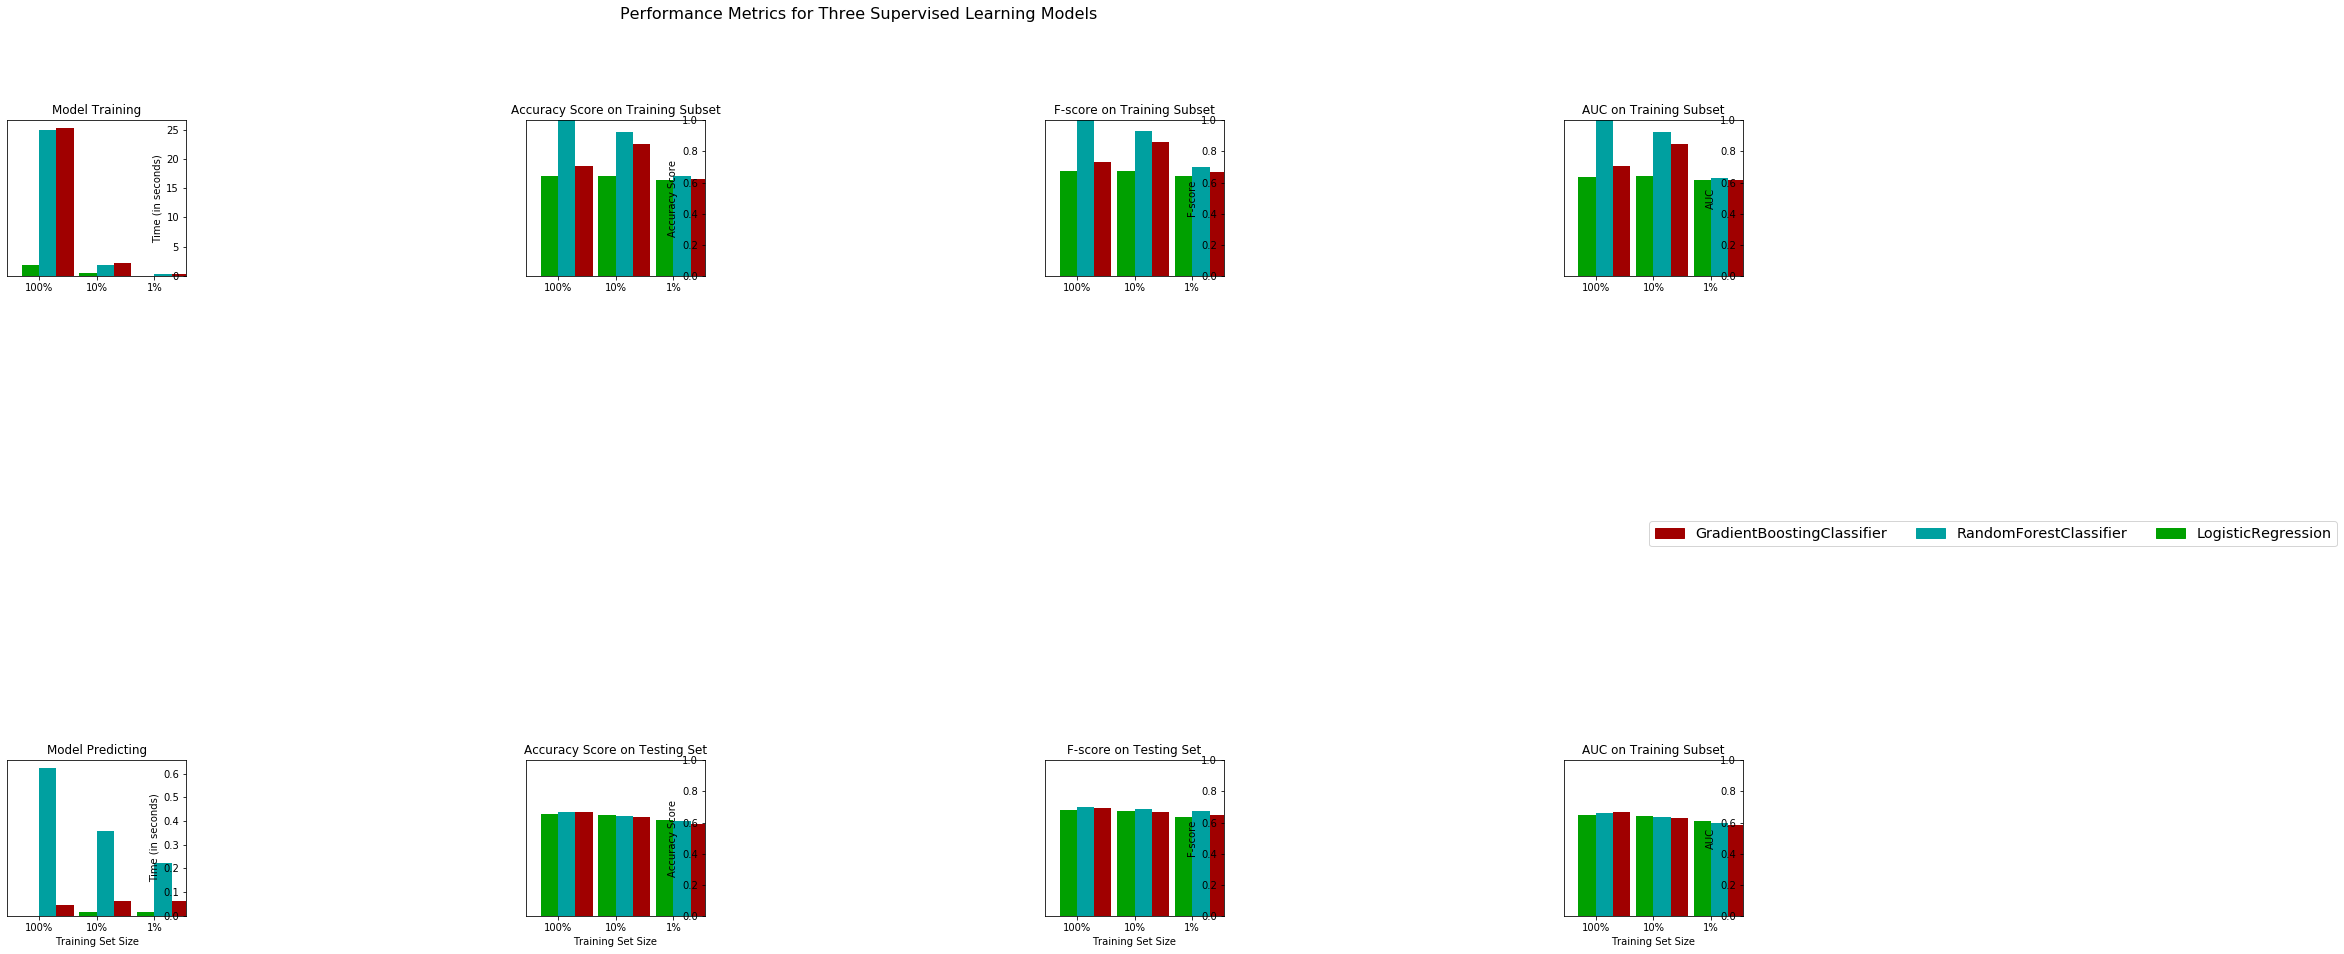

In [160]:
clf_A = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=50, subsample=1.0, verbose=0,
              warm_start=False)
clf_B = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)
clf_C = LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=50, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = int(len(y_train))
samples_10 = int(len(y_train) * 0.1)
samples_1 = int(len(y_train)* 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results, 'perf_opt.jpg')

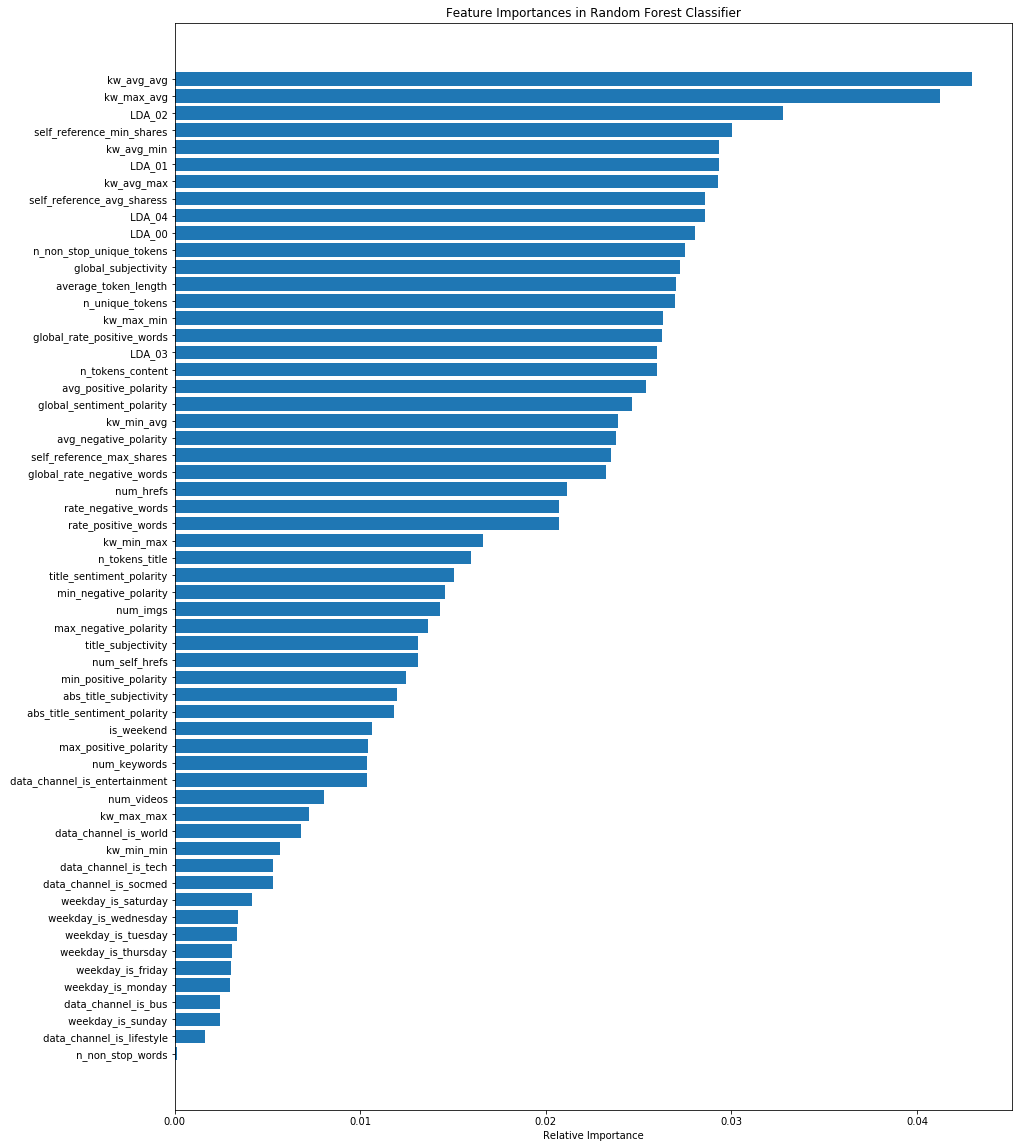

In [145]:
# extracting feature importance

feature_name = features_raw.columns.values
importances = clf_B.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize = (15,20))
plt.title('Feature Importances in Random Forest Classifier')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

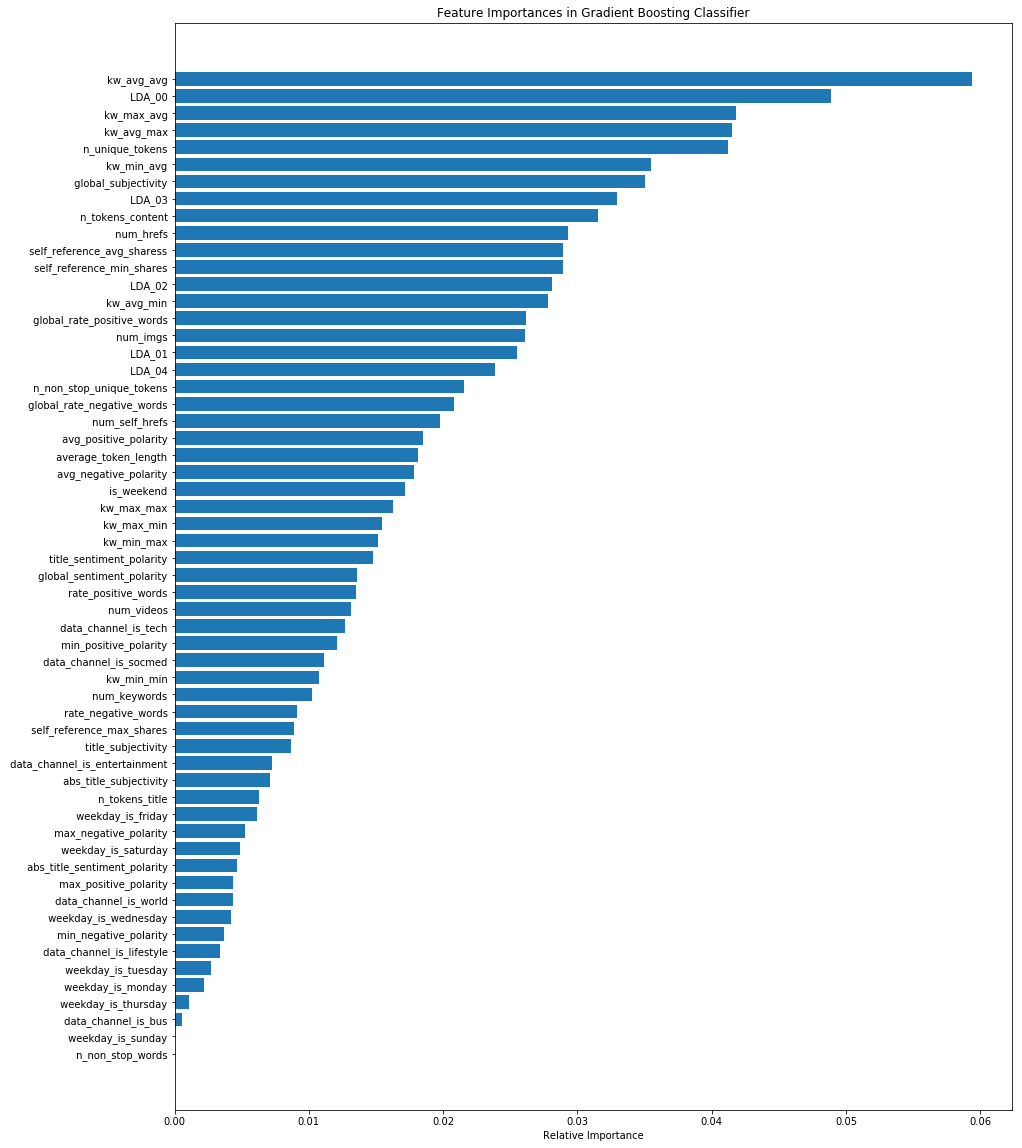

In [146]:
feature_name = features_raw.columns.values
importances = clf_A.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize = (15,20))
plt.title('Feature Importances in Gradient Boosting Classifier')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()